In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv

--2023-06-01 17:57:36--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv’

grades.csv          100%[===================>]     322  --.-KB/s    in 0s      

2023-06-01 17:57:36 (12.6 MB/s) - ‘grades.csv’ saved [322/322]



In [21]:
df_students=pd.read_csv('grades.csv',delimiter=',',header='infer')

In [22]:
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [23]:
#droping the rows that have non
df_students.drop([22,23], axis=0, inplace=True)

In [24]:
#creating a series of all students who passed the given criteria
passes= pd.Series(df_students['Grade']>=60)

In [25]:
passes

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20     True
21     True
Name: Grade, dtype: bool

In [26]:
#concating passes as pass colummn in mainn dataframe
df_students=pd.concat([df_students,passes.rename('Pass')],axis=1)

In [27]:
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [34]:
#all basic statistical values that are required to analyse the dataset
def distribution_info(data):
    min_val= data.min()
    max_val=data.max()
    mean_val=data.mean()
    med_val=data.median()
    mod_val=data.mode()[0]
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                              mean_val,
                                                                                            med_val,
                                                                                              mod_val,
                                                                                              max_val))
    fig,ax=plt.subplots(2,1,figsize=(10,4))
    ax[0].hist(data)
    ax[0].set_ylabel('frequency')
    #adding basic staistical information to the histogram
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)
    
    ax[1].boxplot(data,vert=False)
    ax[1].set_xlabel('value')
    
    fig.suptitle("Data Distribution")
    fig.show()



Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



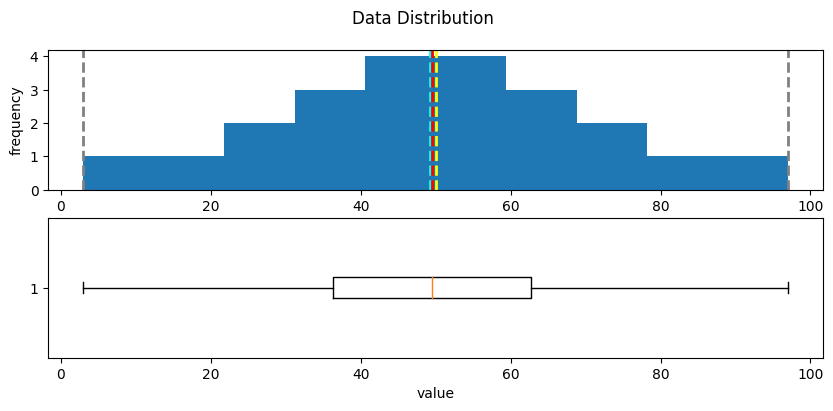

In [35]:
distribution_info(df_students['Grade'])

In [36]:
#this is a typical normal distribution of data 


Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



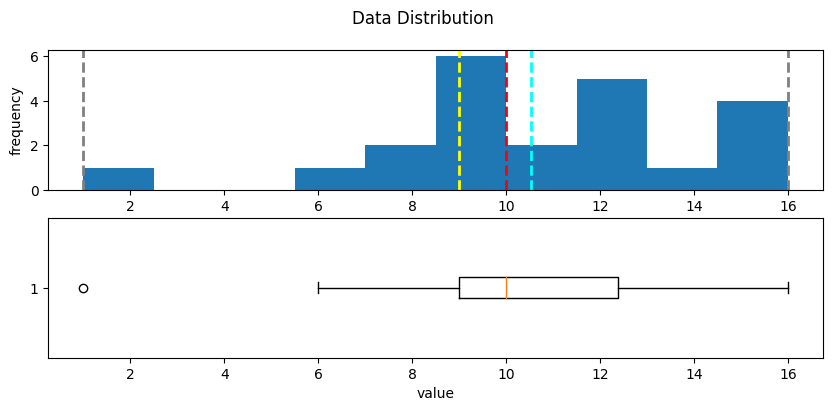

In [37]:
distribution_info(df_students['StudyHours'])

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



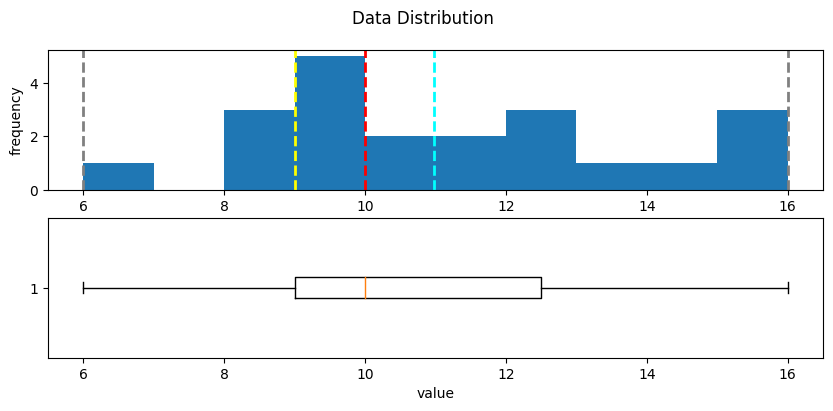

In [38]:
#we can use quantile function to eliminate outliers 
q01 = df_students.StudyHours.quantile(0.01)
distribution_info(df_students[df_students.StudyHours>q01]['StudyHours'])

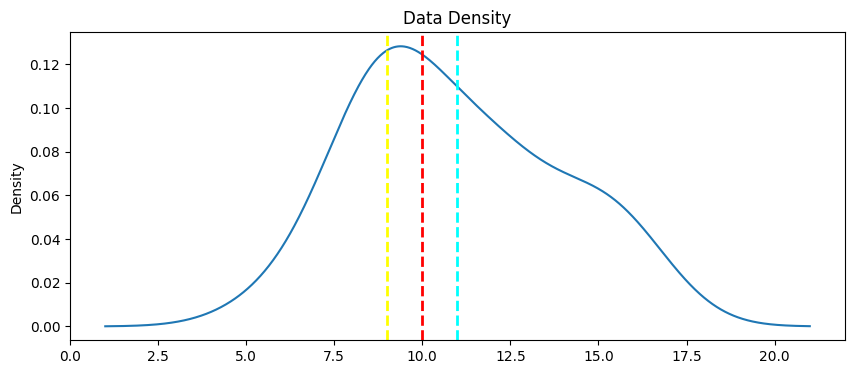

In [41]:
def show_density(data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(df_students[df_students.StudyHours>q01]['StudyHours'])

In [44]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


In [45]:
col = df_students[df_students.StudyHours>q01]['StudyHours']

<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

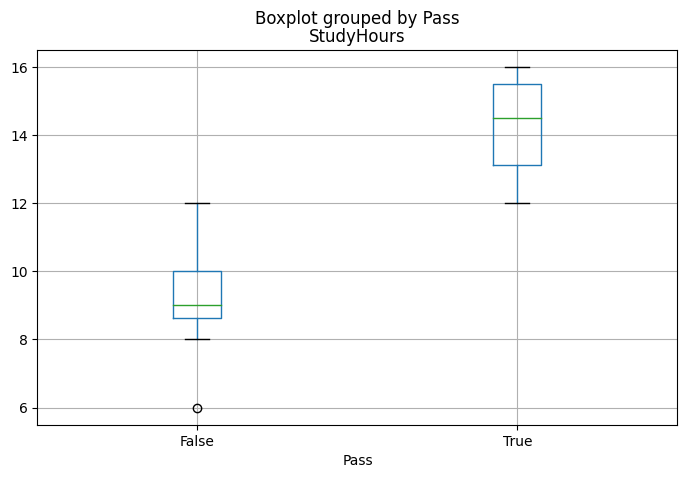

In [47]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

<Axes: xlabel='Name'>

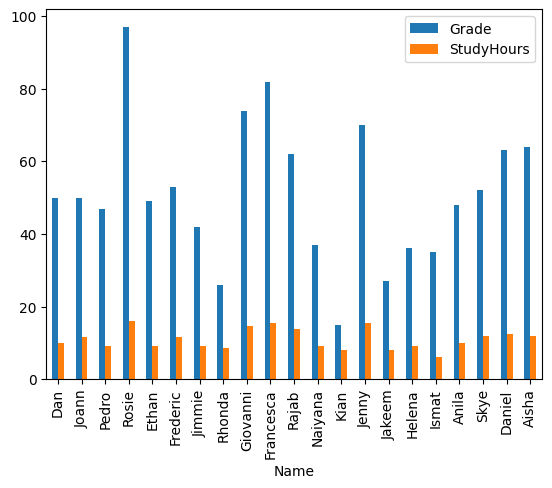

In [48]:
df_sample.plot(x='Name',y=['Grade','StudyHours'],kind='bar')

<Axes: xlabel='Name'>

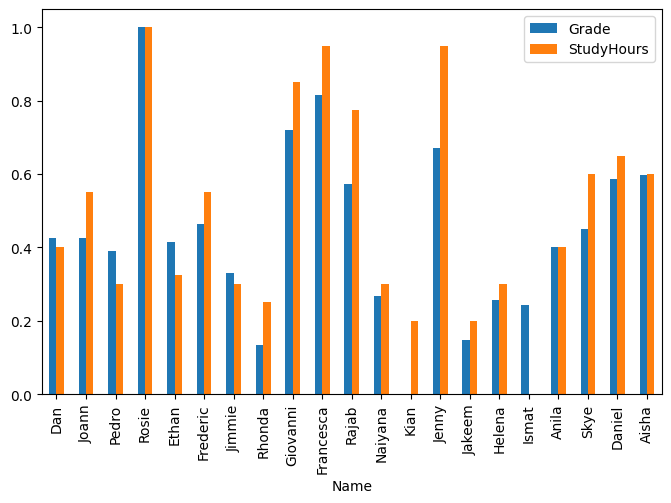

In [50]:
#grades and studyhours didnt seem to have comparable numerical values so scaling them
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_normalized=df_sample[['Name','Grade','StudyHours']].copy()
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

In [51]:
df_normalized.Grade.corr(df_normalized.StudyHours)
#finding Correlation

0.9117666413789677

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

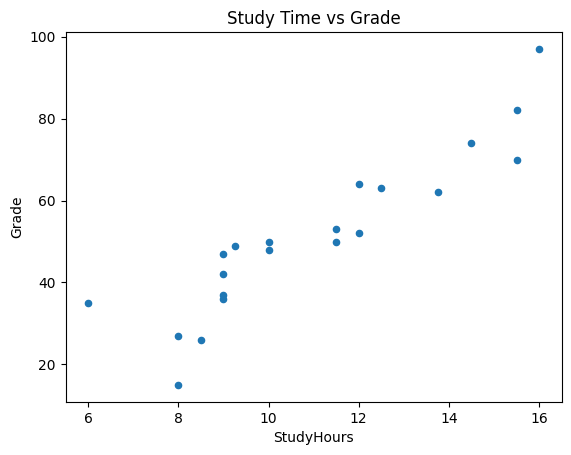

In [52]:
# Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


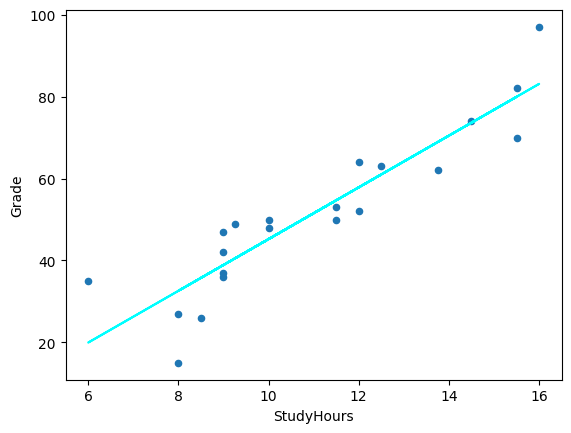

In [54]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept by using linregress function of scipy
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

In [55]:
df_regression

,Grade,StudyHours,fx,error
0,50.0,10.00,45.217846,-4.782154
1,50.0,11.50,54.687985,4.687985
2,47.0,9.00,38.904421,-8.095579
3,97.0,16.00,83.098400,-13.901600
4,49.0,9.25,40.482777,-8.517223
6,53.0,11.50,54.687985,1.687985
7,42.0,9.00,38.904421,-3.095579
8,26.0,8.50,35.747708,9.747708
9,74.0,14.50,73.628262,-0.371738
10,82.0,15.50,79.941687,-2.058313


In [60]:
#finally applying regression model
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 12

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 12 hours per week may result in a grade of 58
